#### 训练数据迭代器测试代码
---

In [1]:
import tools

PATH = tools.Get_PATH()

In [2]:
import numpy as np 

use_random_iter = True

data = np.zeros((50, 32, 128, 128))
data_iter = tools.SeqDataLoader(data, batch_size=2, num_steps=5, use_random_iter=use_random_iter, path=PATH)
X, Y = next(iter(data_iter))

X -> (b, t, c, h, w)      
Y -> (b, h, w)

In [3]:
X.shape, Y.shape

(torch.Size([2, 5, 32, 128, 128]), torch.Size([2, 128, 128]))

In [4]:
X.shape[0] * X.shape[1]

10

#### 网络输出测试代码
---

In [6]:
import tools
from nets import ConvLSTM as net

device = tools.try_gpu()

RNN = net(input_dim=32, hidden_dim=16, kernel_size=3, dec_kernel_size=3,
            num_layers=2, batch_first=True, bias=True).to(device)

In [7]:
RNN.summary(PATH)

In [8]:
pred, _ = RNN(X.to(device))
pred.shape

torch.Size([2, 128, 128])

#### 训练测试代码
---

MSE: 0.000000; 121.2 pictures/sec on cuda:0


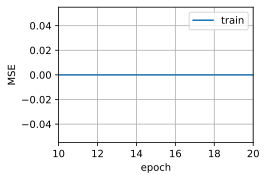

In [9]:
tools.train(RNN, data_iter, 0.1, 20, device, use_random_iter=use_random_iter, path=PATH)

#### 模型加载与保存
---

In [10]:
tools.save(RNN, PATH)

save successfully.


In [11]:
tools.load(RNN, PATH + '\Model.pt', device)

load successfully.
